In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [ ]:
stock_data = pd.read_csv('data/stock_price.csv')


In [ ]:
stock_data

,日付け,終値,始値,高値,安値,出来高,変化率 %
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%
...,...,...,...,...,...,...,...
9197,1987-02-18,191.2,186.3,191.2,186.3,795.09M,4.82%
9198,1987-02-17,182.4,176.5,184.3,175.5,881.51M,3.93%
9199,1987-02-16,175.5,166.7,175.5,165.7,360.51M,1.74%
9200,1987-02-13,172.5,176.5,176.5,172.5,422.38M,-5.43%


In [ ]:
# Checking basic statistics of the dataset to understand key metrics
stock_data.describe()


,終値,始値,高値,安値
count,9202.000000,9202.000000,9202.000000,9202.000000
mean,92.180961,92.256183,93.176451,91.330146
std,50.452228,50.598215,51.049837,50.087405
min,33.000000,33.000000,33.200000,32.200000
25%,52.000000,52.100000,52.800000,51.500000
50%,85.100000,85.100000,86.050000,84.200000
75%,110.800000,110.800000,111.900000,109.275000
max,305.900000,309.800000,311.800000,303.900000


In [ ]:
# Renaming the columns to English for consistency
stock_data.columns = ['Date', 'Closing Price', 'Opening Price', 'High Price', 'Low Price', 'Volume', 'Percentage Change']

# Converting 'Volume' from strings with 'M' and 'B' to numerical values
stock_data['Volume'] = stock_data['Volume'].replace({'M': '*1e6', 'B': '*1e9'}, regex=True).map(pd.eval).astype(float)




In [ ]:
df = stock_data
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               9202 non-null   object 
 1   Closing Price      9202 non-null   float64
 2   Opening Price      9202 non-null   float64
 3   High Price         9202 non-null   float64
 4   Low Price          9202 non-null   float64
 5   Volume             9202 non-null   float64
 6   Percentage Change  9202 non-null   object 
dtypes: float64(5), object(2)
memory usage: 503.4+ KB


Since Date is string (object) type, we convert it to datetime. 

In [ ]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
# df.set_index('Date', inplace=True)

# Converting 'Percentage Change' from string to float
stock_data['Percentage Change'] = stock_data['Percentage Change'].str.replace('%', '').astype(float)

In [ ]:
stock_data.head()

,Date,Closing Price,Opening Price,High Price,Low Price,Volume,Percentage Change
0,2024-08-01,156.3,159.3,159.4,156.1,79150000.0,-2.56
1,2024-07-31,160.4,158.2,160.7,158.1,173910000.0,1.07
2,2024-07-30,158.7,158.8,159.2,158.0,138140000.0,-0.63
3,2024-07-29,159.7,158.7,160.2,158.4,126280000.0,1.14
4,2024-07-26,157.9,159.3,159.6,157.9,155080000.0,-0.13


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               9202 non-null   datetime64[ns]
 1   Closing Price      9202 non-null   float64       
 2   Opening Price      9202 non-null   float64       
 3   High Price         9202 non-null   float64       
 4   Low Price          9202 non-null   float64       
 5   Volume             9202 non-null   float64       
 6   Percentage Change  9202 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 503.4 KB


### EDA : Summary Statistics - Stock Data Analysis

#### Overview
This document provides an analysis of stock price data, including closing, opening, high, and low prices, as well as trading volume and percentage change.

#### Summary Statistics
##### Stock Prices (Closing, Opening, High, Low)
- **Average Closing Price**: ¥92.18
- **Minimum Closing Price**: ¥33.00
- **Maximum Closing Price**: ¥305.90

This indicates a wide range of stock prices in the dataset.

#### Volume
- **Average Trading Volume**: Approximately 172.67 million
- **Standard Deviation**: Significant, suggesting variable trading activity.

#### Percentage Change
- **Mean Daily Percentage Change**: Around 0.02%
- **Range**: From -14.74% to 16.25%, indicating market volatility.


In [ ]:
# Checking for any missing values in the dataset
missing_values = stock_data.isnull().sum()

# Displaying the cleaned dataset and missing values check
missing_values

Date                 0
Closing Price        0
Opening Price        0
High Price           0
Low Price            0
Volume               0
Percentage Change    0
dtype: int64

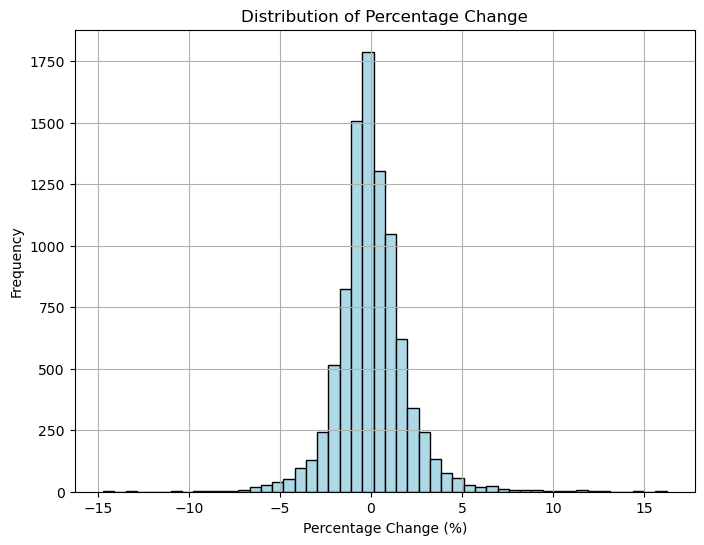

In [ ]:
# Plotting the distribution of percentage change
plt.figure(figsize=(8,6))
plt.hist(stock_data['Percentage Change'], bins=50, color='lightblue', edgecolor='black')
plt.title('Distribution of Percentage Change')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




In [ ]:
stock_data['Date']

0      2024-08-01
1      2024-07-31
2      2024-07-30
3      2024-07-29
4      2024-07-26
          ...    
9197   1987-02-18
9198   1987-02-17
9199   1987-02-16
9200   1987-02-13
9201   1987-02-12
Name: Date, Length: 9202, dtype: datetime64[ns]

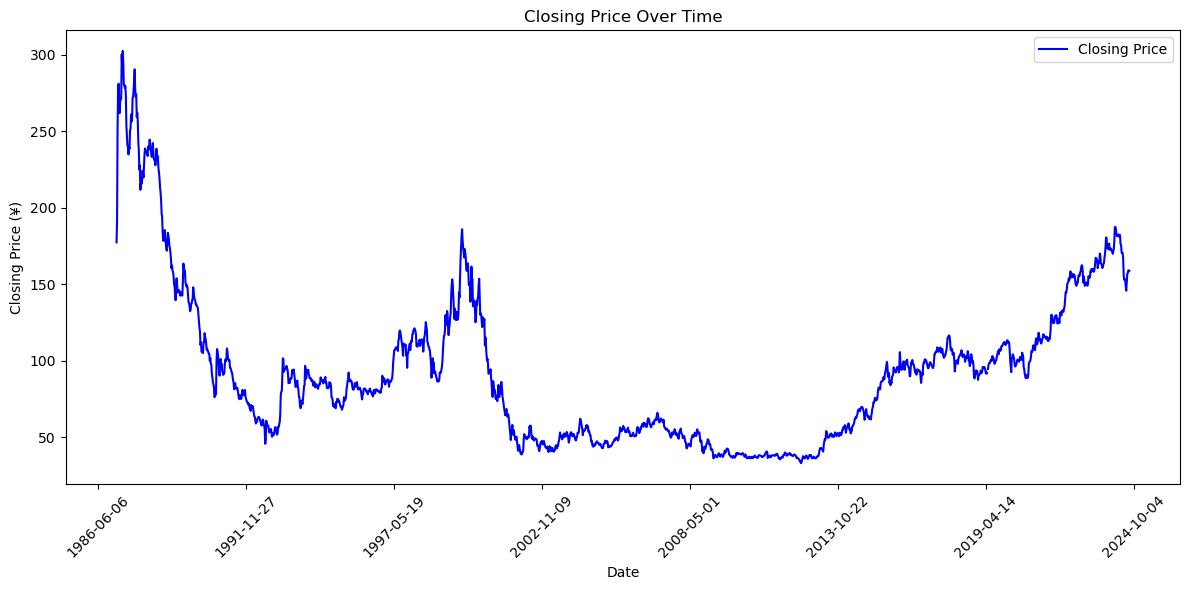

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your 'Date' column is already converted to datetime

# Resample the data to reduce the number of points (e.g., weekly average)
stock_data_resampled = stock_data.resample('W', on='Date').mean()

# Plotting the resampled data
plt.figure(figsize=(12,6))
plt.plot(stock_data_resampled.index, stock_data_resampled['Closing Price'], color='blue', label='Closing Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (¥)')

# Improving x-axis readability
plt.xticks(rotation=45)

# Limit the number of x-ticks shown
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

plt.legend()
plt.tight_layout()
plt.show()


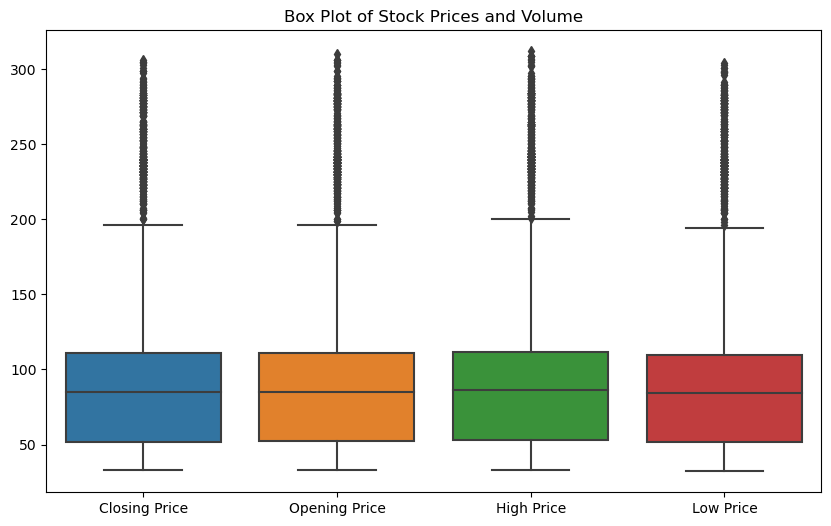

In [ ]:
import seaborn as sns 

# Visualizations
df = stock_data

# Box plot to identify outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=stock_data[['Closing Price', 'Opening Price', 'High Price', 'Low Price']])
plt.title('Box Plot of Stock Prices and Volume')
plt.show()


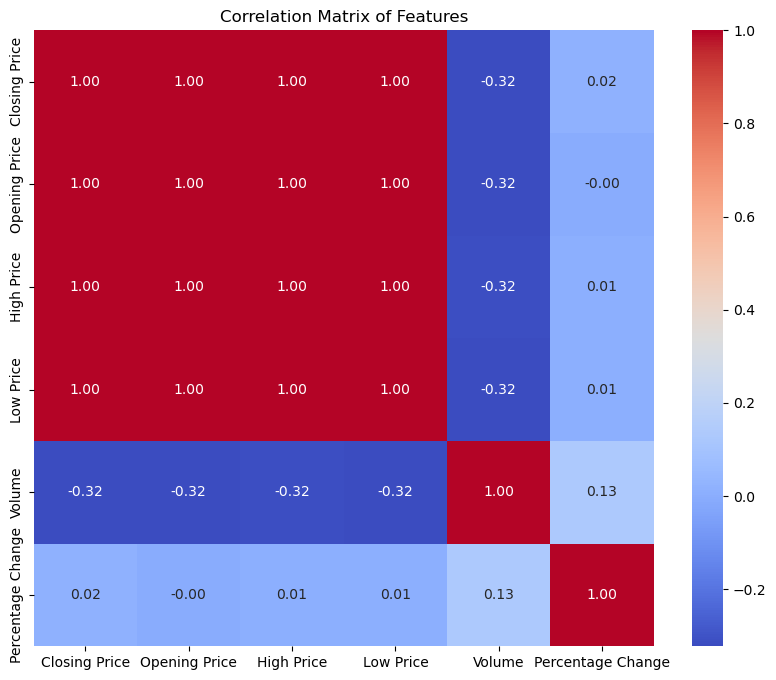

In [ ]:
import seaborn as sns

# Correlation matrix to analyze relationships between features
correlation_matrix = stock_data[['Closing Price', 'Opening Price', 'High Price', 'Low Price', 'Volume', 'Percentage Change']].corr()

# Plotting the correlation matrix with values
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


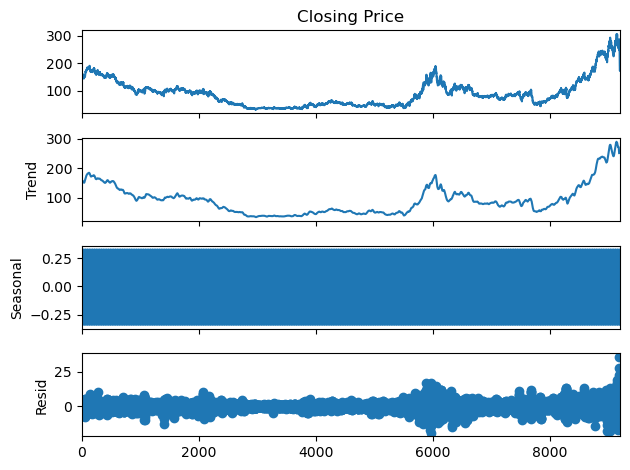

In [ ]:
# Trend and Seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the Closing Price
decomposition = seasonal_decompose(df['Closing Price'], model='additive', period=30)  # assuming monthly seasonality

fig = decomposition.plot()
plt.show()


In [ ]:
# Outlier Detection using Z-Score
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['Closing Price']))
threshold = 3
outliers = np.where(z_scores > threshold)
print(f"Number of outliers in Closing Price: {len(outliers[0])}")


Number of outliers in Closing Price: 177


In [ ]:
# Print date range of the dataset
print('Date Range:', stock_data['Date'].min(), 'to', stock_data['Date'].max())

Date Range: 1987-02-12 00:00:00 to 2024-08-01 00:00:00


In [ ]:
# Feature Engineering

# Moving Averages
df['MA10'] = df['Closing Price'].rolling(window=10).mean()
df['MA50'] = df['Closing Price'].rolling(window=50).mean()

# Lag Features
for lag in range(1, 6):
    df[f'Lag_{lag}'] = df['Closing Price'].shift(lag)

# Volatility (Standard Deviation)
df['Volatility'] = df['Closing Price'].rolling(window=10).std()

# Drop rows with NaN values generated by feature engineering
df.dropna(inplace=True)

print(df.head())


         Date  Closing Price  Opening Price  High Price  Low Price  \
49 2024-05-23          152.8          153.8       154.3      152.0   
50 2024-05-22          154.5          154.8       156.1      153.9   
51 2024-05-21          153.2          153.0       153.3      152.3   
52 2024-05-20          151.8          152.0       154.4      151.5   
53 2024-05-17          151.8          152.0       156.5      151.6   

         Volume  Percentage Change    MA10     MA50  Lag_1  Lag_2  Lag_3  \
49  211370000.0              -1.10  153.52  154.050  152.6  155.8  153.8   
50  220480000.0               0.85  153.72  154.014  152.8  152.6  155.8   
51  206230000.0               0.92  153.62  153.870  154.5  152.8  152.6   
52  357280000.0               0.00  153.30  153.732  153.2  154.5  152.8   
53  417050000.0              -1.43  153.05  153.574  151.8  153.2  154.5   

    Lag_4  Lag_5  Volatility  
49  152.0  152.2    1.290822  
50  153.8  152.0    1.269996  
51  155.8  153.8    1.267368 

### Saving the dataset. 

In [ ]:
df.to_csv('./data/stock_data_preprocessed_unscaled.csv', index=False)